In [2]:
import requests
import re
import os
from bs4 import BeautifulSoup
from urllib.parse import urlsplit
import nltk
from nltk.probability import FreqDist
import matplotlib
from emot.emo_unicode import UNICODE_EMOJI
from emot.emo_unicode import EMOTICONS_EMO


In [4]:
!pip install nltk

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
!pip install emot

In [10]:
files=[]
for i in os.listdir('/content/data'):
    files.append(i)
a=[]
def converting_emojis(text_list):
    for i in range(len(text_list)):
        for x in EMOTICONS_EMO:
            text_list[i] = text_list[i].replace(x, "_".join(EMOTICONS_EMO[x].replace(",","").replace(":","").split()))

    for i in range(len(text_list)):
        for x in UNICODE_EMOJI:
            text_list[i] = text_list[i].replace(x, "_".join(UNICODE_EMOJI[x].replace(",","").replace(":","").split()))

    return text_list
for i in files:
    f = open('/content/data/'+ i, "r", encoding="utf-8")
    text = f.read()
    text_pre=text.replace("\n","")  #bỏ dòng trống
    text_pre=text.lower() #chuyển văn bản thành chữ thường
    text_pre = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text_pre = re.sub(r"[!@#$[]()]'", "", text_pre)  # Remove character: !@#$[]()
    text_pre = nltk.sent_tokenize(text_pre) #tach cau
    text_pre = converting_emojis(text_pre)
    a.append(text_pre)
    folder_path = "/content/data_new"



    b=str(text_pre)
    # Tạo hoặc mở tệp để ghi nội dung
    file_path = os.path.join(folder_path, i+'new'+".txt")
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(b)

    # In ra đường dẫn của tệp
    print("Tệp đã được lưu tại:", file_path)

Tệp đã được lưu tại: /content/data_new/11632.txtnew.txt
Tệp đã được lưu tại: /content/data_new/11720.txtnew.txt
Tệp đã được lưu tại: /content/data_new/11625.txtnew.txt
Tệp đã được lưu tại: /content/data_new/11815.txtnew.txt
Tệp đã được lưu tại: /content/data_new/11722.txtnew.txt
Tệp đã được lưu tại: /content/data_new/11810.txtnew.txt
Tệp đã được lưu tại: /content/data_new/11803.txtnew.txt
Tệp đã được lưu tại: /content/data_new/11618.txtnew.txt
Tệp đã được lưu tại: /content/data_new/11698.txtnew.txt
Tệp đã được lưu tại: /content/data_new/11763.txtnew.txt
Tệp đã được lưu tại: /content/data_new/11554.txtnew.txt
Tệp đã được lưu tại: /content/data_new/11641.txtnew.txt
Tệp đã được lưu tại: /content/data_new/11765.txtnew.txt
Tệp đã được lưu tại: /content/data_new/11597.txtnew.txt
Tệp đã được lưu tại: /content/data_new/11723.txtnew.txt
Tệp đã được lưu tại: /content/data_new/11716.txtnew.txt
Tệp đã được lưu tại: /content/data_new/11678.txtnew.txt
Tệp đã được lưu tại: /content/data_new/11519.txt

In [12]:
all_text = []
for text in a:
    all_text.extend(text)

[('thấy mn khen nhìu nên mình cũg thử order  với 1 cảm_giác phấn_khích chờ đem tới   \nvà rồi   đồ thật   ít có lung_linh như hình_mẫu  v và cảm_nhận ko bung lụa miếg nào như cmt khen_ngợi mà mình đọc  v bánh_cuốn cũg được  nhỏ_xíu  nước sốt cũg ko có j đặc_biệt  bánh lắc cũg tạm nhưg bên_cạnh đó theo cảm_nhận của mình ăn có hơi cảm_giác vị dầu chiên ấy  nên mau ngán  bánh bơ thì ngon  mn ăn nhớ đọc hạn   vd  vì mình mua 251 mà thấy hạn 12 ngày tính_từ ngày 201 ấy  đc cái bánh trág vẫn dẻo ko bị khô cứg \n_ tóm_lại là sản_phẩm ko dở  nhưg ăn nhanh ngán     theo mình \n nhân_viên lịch_sự  có nhắc hạn_dùng  nhưng việc ship còn chưa ổn lắm  \nquay lại  10', 1), ('chạy hơn 50km từ sài gòn lên  đường vào có khoảng 1km đất_đỏ  nghe quảng_cáo khu du_lịch đang miễn vé vào cổng  nhưng vẫn phụ rhu 15kngười nếu mang đồ_ăn nước uống vào  tốn thêm 5k giữ xe  và nói_chung là siêu thất_vọng  thác không có lấy 1 giọt nước  cảm_giác giống như bị gạt  vô chụp dc 1 tấm hình xong rồi về và ko hẹn ngày qua

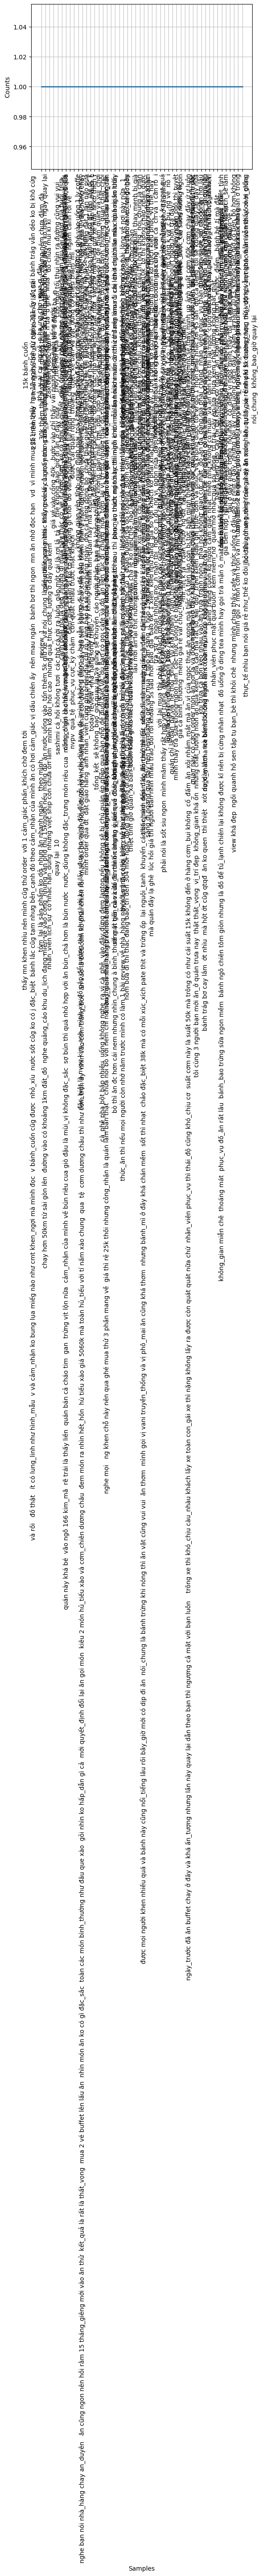

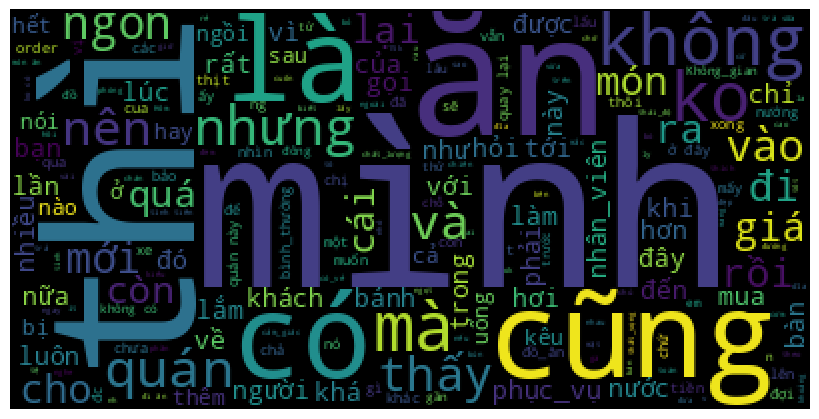

In [13]:
frequency_dist = FreqDist(word.lower() for word in all_text)

## show only th top 50 results
print(frequency_dist.most_common(50))


## Consider words with length greater than 3 and plot
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50,cumulative=False)


## Build a word cloud
# install library
# pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Chuỗi văn bản đa dòng

# Chuyển đổi đoạn văn bản đa dòng thành văn bản một dòng
single_line_text = ' '.join(all_text)

# Tạo WordCloud từ văn bản một dòng
wordcloud = WordCloud().generate(single_line_text)

# Hiển thị WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Khởi tạo TfidfVectorizer
vectorizer = TfidfVectorizer()

# Sử dụng TfidfVectorizer để biểu diễn tập dữ liệu
features = vectorizer.fit_transform(all_text)
print(features.toarray())


[[0.         0.         0.07959823 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(all_text)

tf_idf_array = tf_idf_vector.toarray()

W = tr_idf_model.get_feature_names_out()


df_tf_idf = pd.DataFrame(tf_idf_array, columns = W)
print(df_tf_idf)

     00pm  05p        10  100k  1073000vnd       10k  10kdĩa  10p        11  \
0     0.0  0.0  0.079598   0.0         0.0  0.000000     0.0  0.0  0.000000   
1     0.0  0.0  0.000000   0.0         0.0  0.000000     0.0  0.0  0.000000   
2     0.0  0.0  0.000000   0.0         0.0  0.124863     0.0  0.0  0.000000   
3     0.0  0.0  0.000000   0.0         0.0  0.000000     0.0  0.0  0.000000   
4     0.0  0.0  0.000000   0.0         0.0  0.000000     0.0  0.0  0.000000   
..    ...  ...       ...   ...         ...       ...     ...  ...       ...   
167   0.0  0.0  0.000000   0.0         0.0  0.000000     0.0  0.0  0.052267   
168   0.0  0.0  0.000000   0.0         0.0  0.000000     0.0  0.0  0.000000   
169   0.0  0.0  0.000000   0.0         0.0  0.000000     0.0  0.0  0.000000   
170   0.0  0.0  0.000000   0.0         0.0  0.000000     0.0  0.0  0.000000   
171   0.0  0.0  0.000000   0.0         0.0  0.000000     0.0  0.0  0.000000   

     110k  ...   ốc  ốc_bươu   ốm   ốp   ồm   ồn   

In [24]:
def generate_ngrams(text_list, n):
    ngrams = []
    for text in text_list:
        words = text.split()
        for i in range(len(words) - n + 1):
            ngram = ' '.join(words[i:i + n])
            ngrams.append(ngram)
    return ngrams

n = 2  # Số từ trong mỗi n-gram
ngrams = generate_ngrams(all_text, n)
print(ngrams)

['Thấy mn', 'mn khen', 'khen nhìu', 'nhìu nên', 'nên mình', 'mình cũg', 'cũg thử', 'thử order', 'order với', 'với 1', '1 cảm_giác', 'cảm_giác phấn_khích', 'phấn_khích chờ', 'chờ đem', 'đem tới', 'tới và', 'và rồi', 'rồi đồ', 'đồ thật', 'thật ít', 'ít có', 'có lung_linh', 'lung_linh như', 'như hình_mẫu', 'hình_mẫu v', 'v và', 'và cảm_nhận', 'cảm_nhận ko', 'ko bung', 'bung lụa', 'lụa miếg', 'miếg nào', 'nào như', 'như cmt', 'cmt khen_ngợi', 'khen_ngợi mà', 'mà mình', 'mình đọc', 'đọc v', 'v bánh_cuốn', 'bánh_cuốn cũg', 'cũg được', 'được nhỏ_xíu', 'nhỏ_xíu nước', 'nước sốt', 'sốt cũg', 'cũg ko', 'ko có', 'có j', 'j đặc_biệt', 'đặc_biệt bánh', 'bánh lắc', 'lắc cũg', 'cũg tạm', 'tạm nhưg', 'nhưg bên_cạnh', 'bên_cạnh đó', 'đó theo', 'theo cảm_nhận', 'cảm_nhận của', 'của mình', 'mình ăn', 'ăn có', 'có hơi', 'hơi cảm_giác', 'cảm_giác vị', 'vị dầu', 'dầu chiên', 'chiên ấy', 'ấy nên', 'nên mau', 'mau ngán', 'ngán bánh', 'bánh bơ', 'bơ thì', 'thì ngon', 'ngon mn', 'mn ăn', 'ăn nhớ', 'nhớ đọc', 'đ